In [2]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import  SelectKBest, f_classif




#from sklearn.pipeline import make_pipeline 

## IMPORTATION DE LA BASE DE DONNEES 
Notre fichier est decomposé de 4 sous bases:
    
— La rubrique carac qui décrit les circonstances générales de l’accident avec 16 variables.

— La rubrique lieux qui décrit le lieu de l’accident avec 18 variables.

— La rubrique veh qui décrit les véhicules impliqués dans l’accident avec 9 variables.

— La rubrique vict qui décrit les individus victimes de l’accident avec 12 variables

Chaque accident est représenté par un numéro appelé Num_Acc permettant de l’identifier dansles différentes bases.

In [3]:
d_carac=pd.read_csv('carac.csv',sep=';',low_memory=False)
d_lieux=pd.read_csv('lieux.csv',sep=';',low_memory=False)
d_veh=pd.read_csv('veh.csv',sep=';',low_memory=False)
d_vict=pd.read_csv('vict.csv',sep=';',low_memory=False)


## ANALYSE DE FORME DE CHAQUE SOUS BASES


## La sous base caracteristiques

In [4]:
d_carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du gйnйral de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590


In [5]:
print(d_carac.shape)
print(d_carac.dtypes.value_counts())

(56782, 16)
int64      10
float64     4
object      2
dtype: int64


Parmi les 16 variables de la sous-base caracteristique, 12 sont qualitatives et 4 est quantitatives.

## La sous base Lieux:


In [6]:
d_lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


In [7]:
print(d_lieux.shape)
print(d_lieux.dtypes.value_counts())

(56782, 18)
float64    14
int64       2
object      2
dtype: int64


Parmi les 18 variables de la sous-base lieux, 4 sont qualitatives et 14 est quantitatives.

## La sous base vehicule

In [10]:
d_veh.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201800000001,0.0,7,0,0.0,2.0,3.0,1.0,B01
1,201800000001,0.0,7,0,0.0,2.0,2.0,15.0,A01
2,201800000002,0.0,7,0,0.0,1.0,0.0,1.0,A01
3,201800000003,0.0,33,0,1.0,2.0,1.0,1.0,A01
4,201800000003,0.0,7,0,0.0,2.0,8.0,15.0,B01


In [11]:
print(d_veh.shape)
print(d_veh.dtypes.value_counts())

(97196, 9)
float64    5
int64      3
object     1
dtype: int64


Parmi les 9 variables de la sous-base vehicule, 4 sont qualitatives et 5 est quantitatives.

## La sous base victime
Elle contient notre variable cible grav qui determine la gravité de l'accident suibit par le victime.
nous distinguons :
    
— Les indemnes : impliqués non décédés et dont l’état ne nécessite aucun soin médical.
    
— Les victimes : impliqués non indemnes.
    
Parmi les victimes, nous distinguons :
    
— Les tués : toute personne qui décède suite à l’accident.
    
— Les blessés : victimes non tuées.
    
Parmi les blessés, nous distinguons :
    
— Les blessés hospitalisés : victimes admises comme patients dans un hôpital.
    
— Les blessés légers : victimes ayant fait l’objet de soins médicaux mais n’ayant pas été admises
    
comme patients à l’hôpital.

Le but du projet est de prédire la variable "grav" contenue dans le ﬁchier Vict.csv.

Cette variable, qui représente la gravité de l’accident (1 = indemne, 2 = tué, 3 = blessé hospitalisé, 4 = blessé "léger").

In [12]:
d_vict.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01


In [13]:
print(d_vict.shape)
print(d_vict.dtypes.value_counts())

(127951, 12)
float64    7
int64      4
object     1
dtype: int64


 Parmi les 12 variables de la sous-base vehicule, 5 sont qualitatives et 7 est quantitatives.

# ANALYSE DE LA GRAVITE:
Une première analyse de notre base de données à été de regarder l’évolution de la proportion des
modalités de la gravité 

Pourcentages des victimes indemens:0.4163156208235965
_______________________________________________
Pourcentages des victimes indemens:0.026346023086962978
_______________________________________________
Pourcentages des victimes indemens:0.17151096904283672
_______________________________________________
Pourcentages des victimes indemens:0.3858273870466038
_______________________________________________


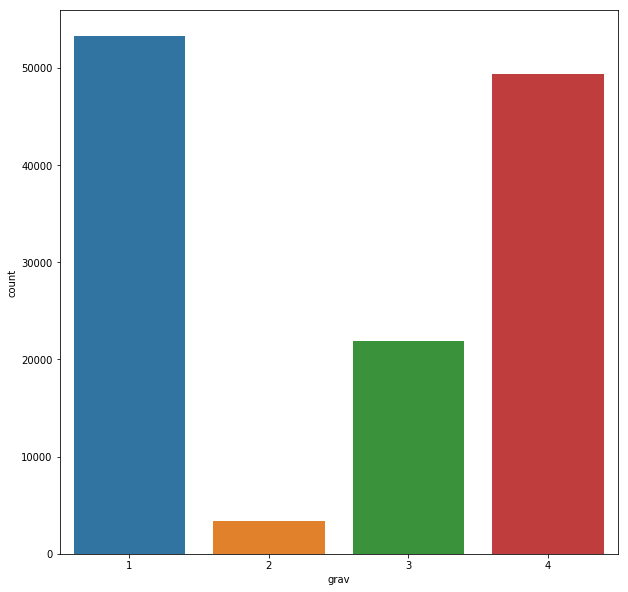

In [14]:
plt.figure(figsize=(10,10))
y=d_vict['grav']
sns.countplot(y)
indemne=y.value_counts()[1]/len(y)
Tue=y.value_counts()[2]/len(y)
blesse_hospitalise=y.value_counts()[3]/len(y)
blesse_leger=y.value_counts()[4]/len(y)
print(f'Pourcentages des victimes indemens:{indemne}')
print("_______________________________________________")
print(f'Pourcentages des victimes indemens:{Tue}')
print("_______________________________________________")
print(f'Pourcentages des victimes indemens:{blesse_hospitalise}')
print("_______________________________________________")
print(f'Pourcentages des victimes indemens:{blesse_leger}')
print("_______________________________________________")


In [15]:
d_vict['grav'].value_counts(normalize=True)

1    0.416316
4    0.385827
3    0.171511
2    0.026346
Name: grav, dtype: float64

Notre variable d’intérêt grav à prédire, est une variable à quatre modalités, avec une classe minoritairela classe des victimes tués= avec 2%, majoritaire (la classe des victimes indemnes) soit environ 41%,38% de blessés legers et 17% de blessés hospitalisés.

En considerant que la gravité est seulement à deux modalités, on peut voir que les indemenes seraient 41% de usagers et les victimes à 59% environs qui contiendraient (tué,blessé hospitalisé et blessé leger).

# ANALYSE DES VALEURS MANQUANTES:

## La sous base caracteristiques:

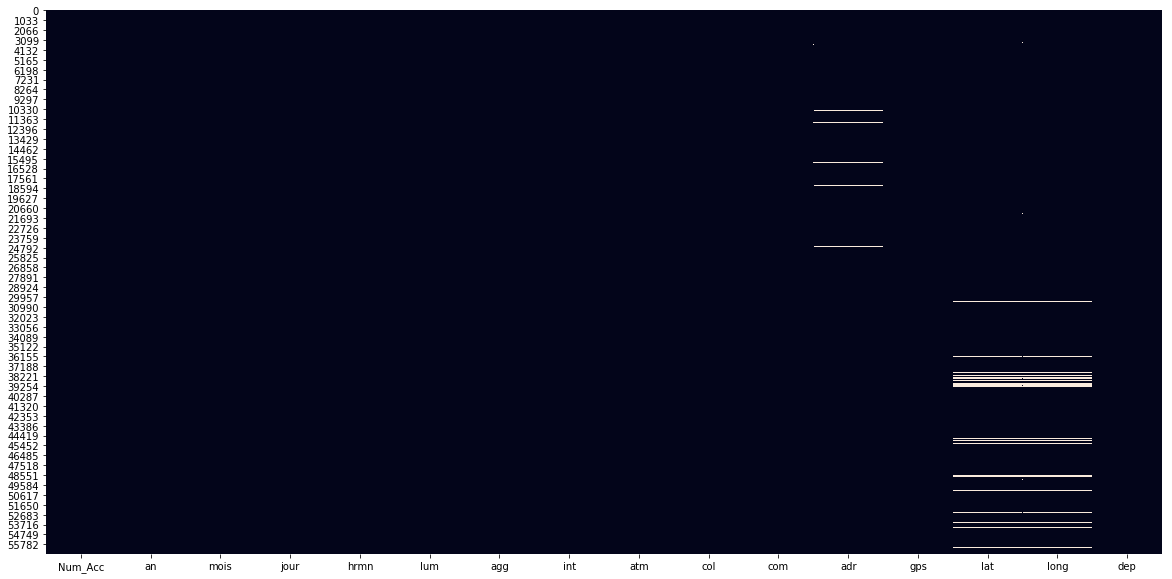

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(d_carac.isna(),cbar=False)

Presence de peu de valeurs manquantes.

In [39]:

d_carac.isna().sum()/d_carac.shape[0]

Num_Acc    0.000000
an         0.000000
mois       0.000000
jour       0.000000
hrmn       0.000000
lum        0.000000
agg        0.000000
int        0.000000
atm        0.000088
col        0.000035
com        0.000000
adr        0.009598
gps        0.000881
lat        0.032017
long       0.032017
dep        0.000000
dtype: float64

## La sous base lieux

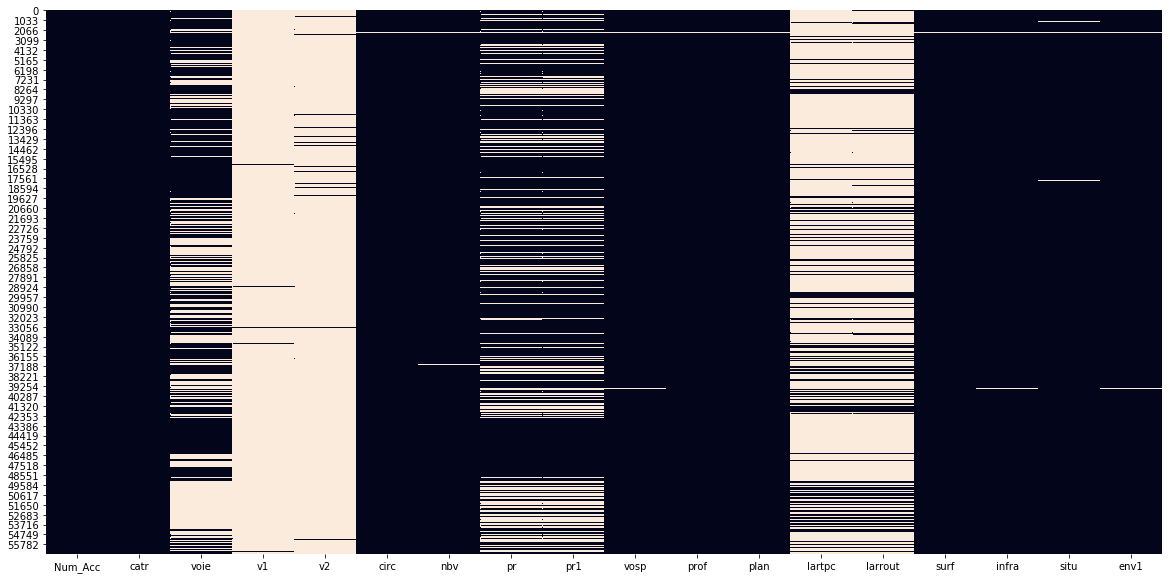

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(d_lieux.isna(),cbar=False)


In [41]:
d_lieux.isna().sum()/d_lieux.shape[0]

Num_Acc    0.000000
catr       0.000000
voie       0.373904
v1         0.997059
v2         0.952731
circ       0.007080
nbv        0.008841
pr         0.273942
pr1        0.278768
vosp       0.009175
prof       0.007714
plan       0.007379
lartpc     0.769469
larrout    0.762143
surf       0.007767
infra      0.008207
situ       0.008700
env1       0.008084
dtype: float64

En analysant les valeurs manquates de notre basse concatener on remarque que les variables
V1: Indice numérique du numéro de route et V2: Lettre indice alphanumérique de la route ont 
plus de plus de 95% de valeurs manquante qui ne nous servira pas grand chose pour la prediction.
Les deux variables lartpc et larrout ont plus de 75% de valeurs manquantes, de plus voie, pr1 et pr ont respectivement
37%,27% et 27% de valeurs manquantes.

## La sous base vehicule

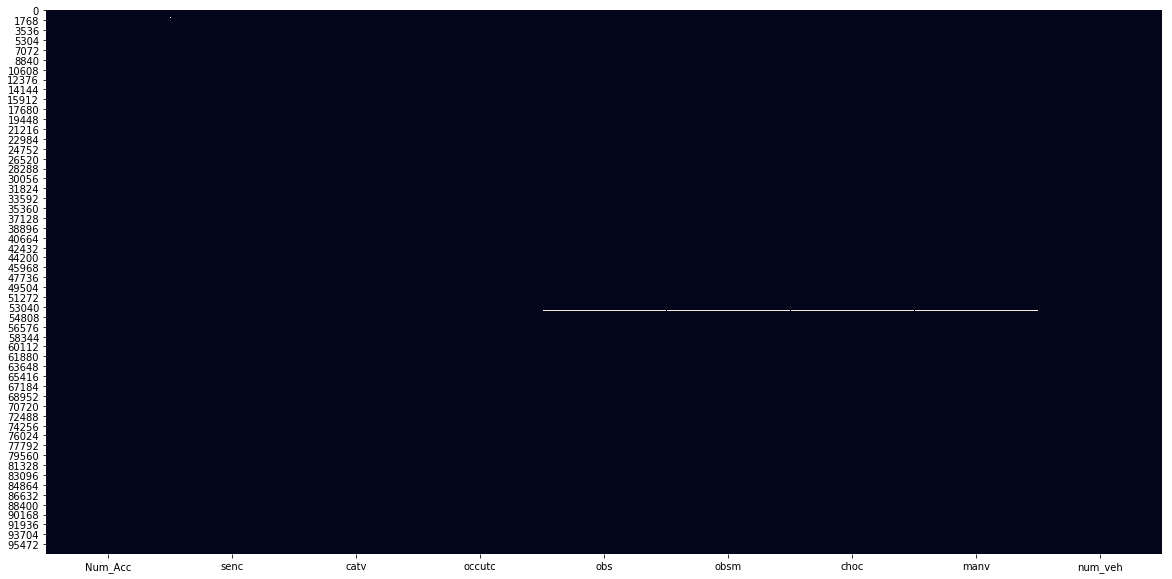

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(d_veh.isna(),cbar=False)

In [44]:
d_veh.isna().sum()/d_veh.shape[0]

Num_Acc    0.000000
senc       0.001327
catv       0.000000
occutc     0.000000
obs        0.001924
obsm       0.001368
choc       0.001338
manv       0.001338
num_veh    0.000000
dtype: float64

Presence de très peu de valeurs manquantes.

## La sous base victime

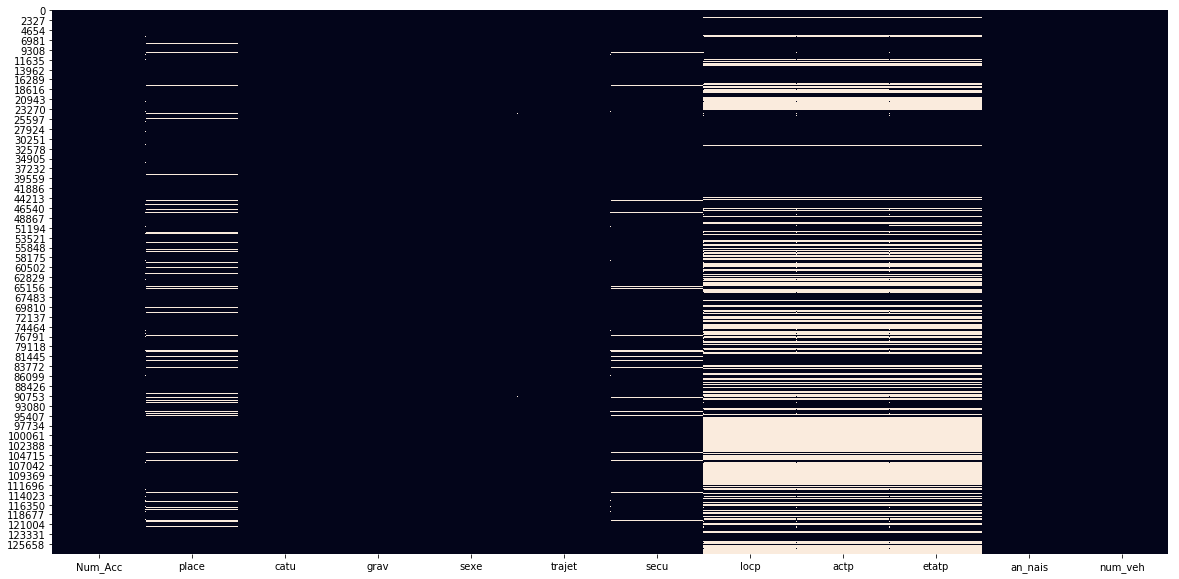

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(d_vict.isna(),cbar=False)

In [47]:
d_vict.isna().sum()/d_vict.shape[0]

Num_Acc    0.000000
place      0.083829
catu       0.000000
grav       0.000000
sexe       0.000000
trajet     0.000891
secu       0.031684
locp       0.414659
actp       0.414643
etatp      0.414635
an_nais    0.000234
num_veh    0.000000
dtype: float64

En regardant notre sous base on remarque certaines valeurs manquantes, comme les variables place et secu qui en ont peu,
locp,actp et etatp sont a tous 41%.

#  NOUVELLE BASE DE DONNEES
## Modification de la sous-base caracteristique

In [18]:
#d_carac.head()

La variable année de l'accident (toujours 2018) n'interviennent n'est pas interessante pour la suite de l'etude, on va devoir suprimé cette colonne.

In [92]:
d_carac=d_carac.drop('an',axis=1)

In [52]:
#d_carac.head()

## Modification de la sous-base lieux

In [19]:
#d_lieux.head()

In [20]:
(d_lieux.isna().sum()/d_lieux.shape[0]).sort_values(ascending=True)

Num_Acc    0.000000
catr       0.000000
circ       0.007080
plan       0.007379
prof       0.007714
surf       0.007767
env1       0.008084
infra      0.008207
situ       0.008700
nbv        0.008841
vosp       0.009175
pr         0.273942
pr1        0.278768
voie       0.373904
larrout    0.762143
lartpc     0.769469
v2         0.952731
v1         0.997059
dtype: float64

 On va devoir suprimer les variables qui ont plus de 90% de valeurs manquantes, etant admissible statistiquement avec un tel quantité de donnée.


In [93]:
d_lieux=d_lieux[d_lieux.columns[d_lieux.isna().sum()/d_lieux.shape[0]<0.9]]
#d_lieux.head()


In [58]:
print(d_lieux.shape)

(56782, 16)


In [23]:
print(d_carac.shape)
print(d_lieux.shape)
print(d_veh.shape)
print(d_vict.shape)

(56782, 16)
(56782, 16)
(97196, 9)
(127951, 12)


# SIGNIFICATION DE NOS VARIABLES
## SOUS BASES CARACTERE


<Figure size 432x288 with 0 Axes>

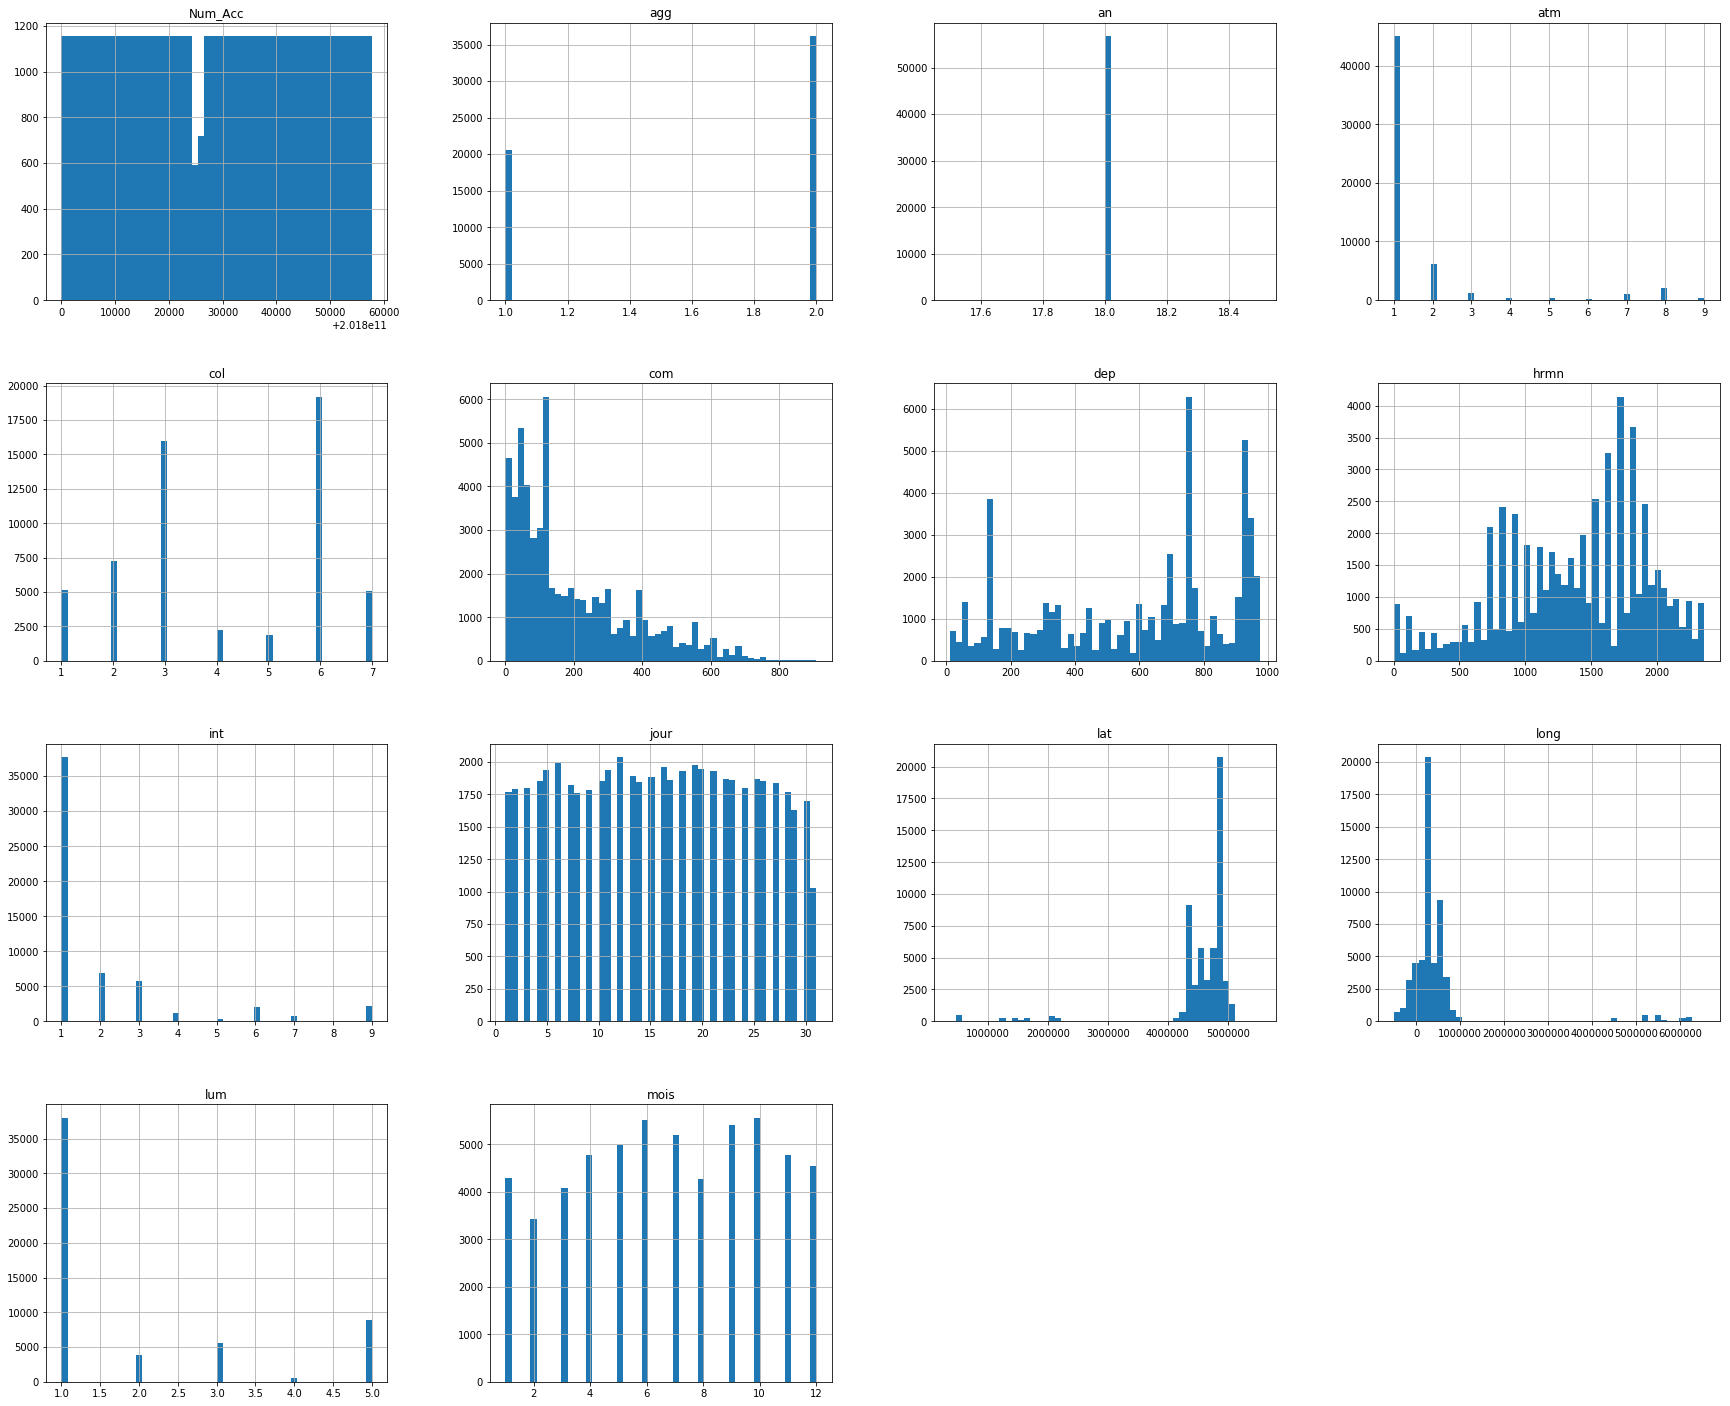

In [24]:
plt.figure()
d_carac.hist(bins=50,figsize=(30,25))
plt.show()

les variables agg, atm, col, int jour, mois lum sont discrète.La variable lumière nous montre que la majorité des accident est fait durant la journée, indiqué par la valeur 1 et hors intersection d'après la variable int, pour col autre coillsion et deux vehicule par coté sont les plus frequentes,la variable atmosphère nous montre que la plupart des accidents sont faites dans les conditions normales et de plus les faites sous agglomeration sont dominants

## Sous base lieux

<Figure size 432x288 with 0 Axes>

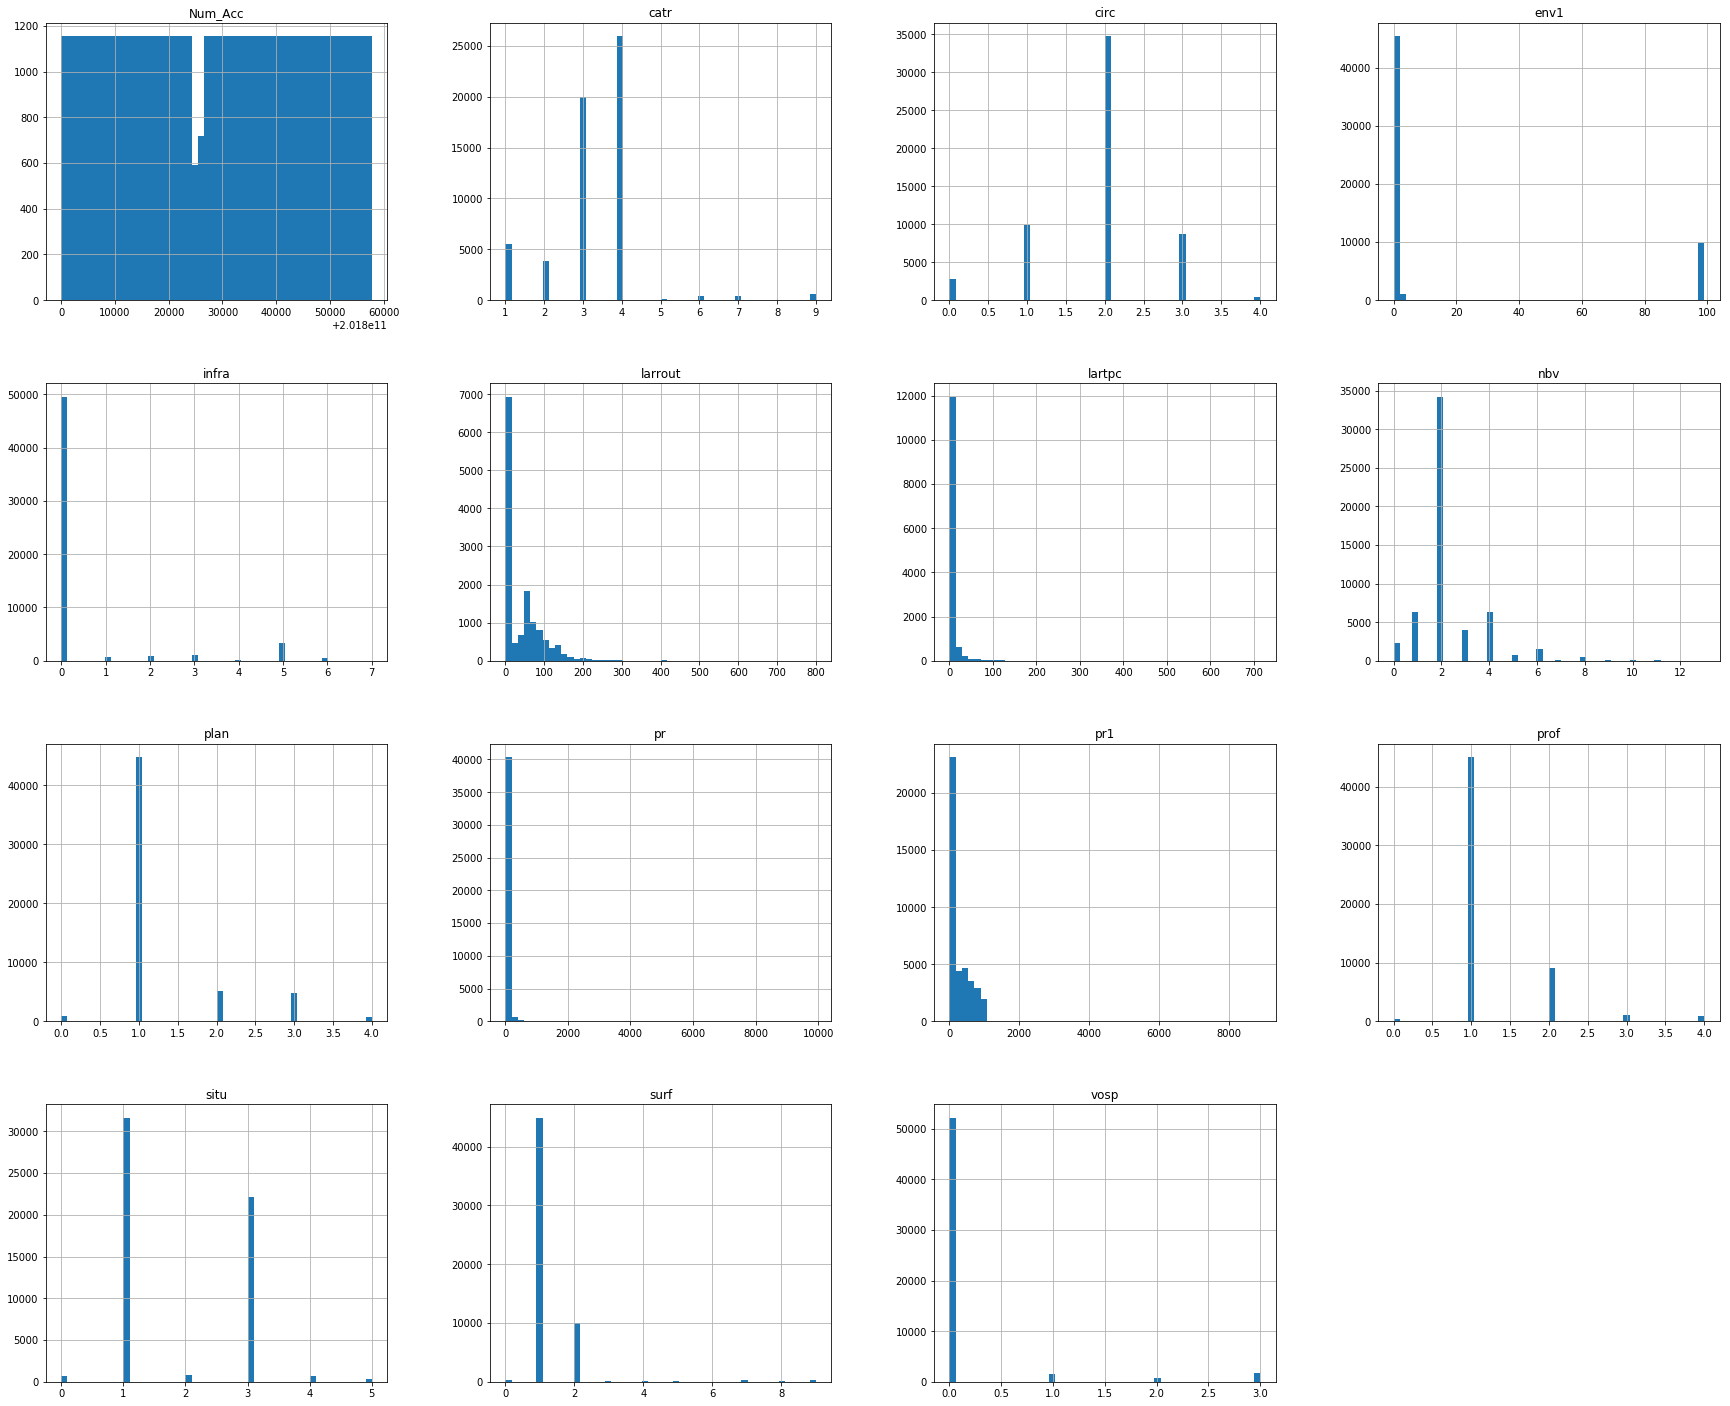

In [68]:
plt.figure()
d_lieux.hist(bins=50,figsize=(30,25))
plt.show()

En analysant ces graphiques concernant la sous base lieux, les variables catr,circ,nbv,plan,prof, surface et situ  on met en évidence qu'en réalité la plupart des accidents sont produits sur des voies communales, des circulations bidirectionnelles sur des deux voies, sur des plans rectilignes, sur des surfaces normales et sur des chaussées.

## Sous base vehicule

<Figure size 432x288 with 0 Axes>

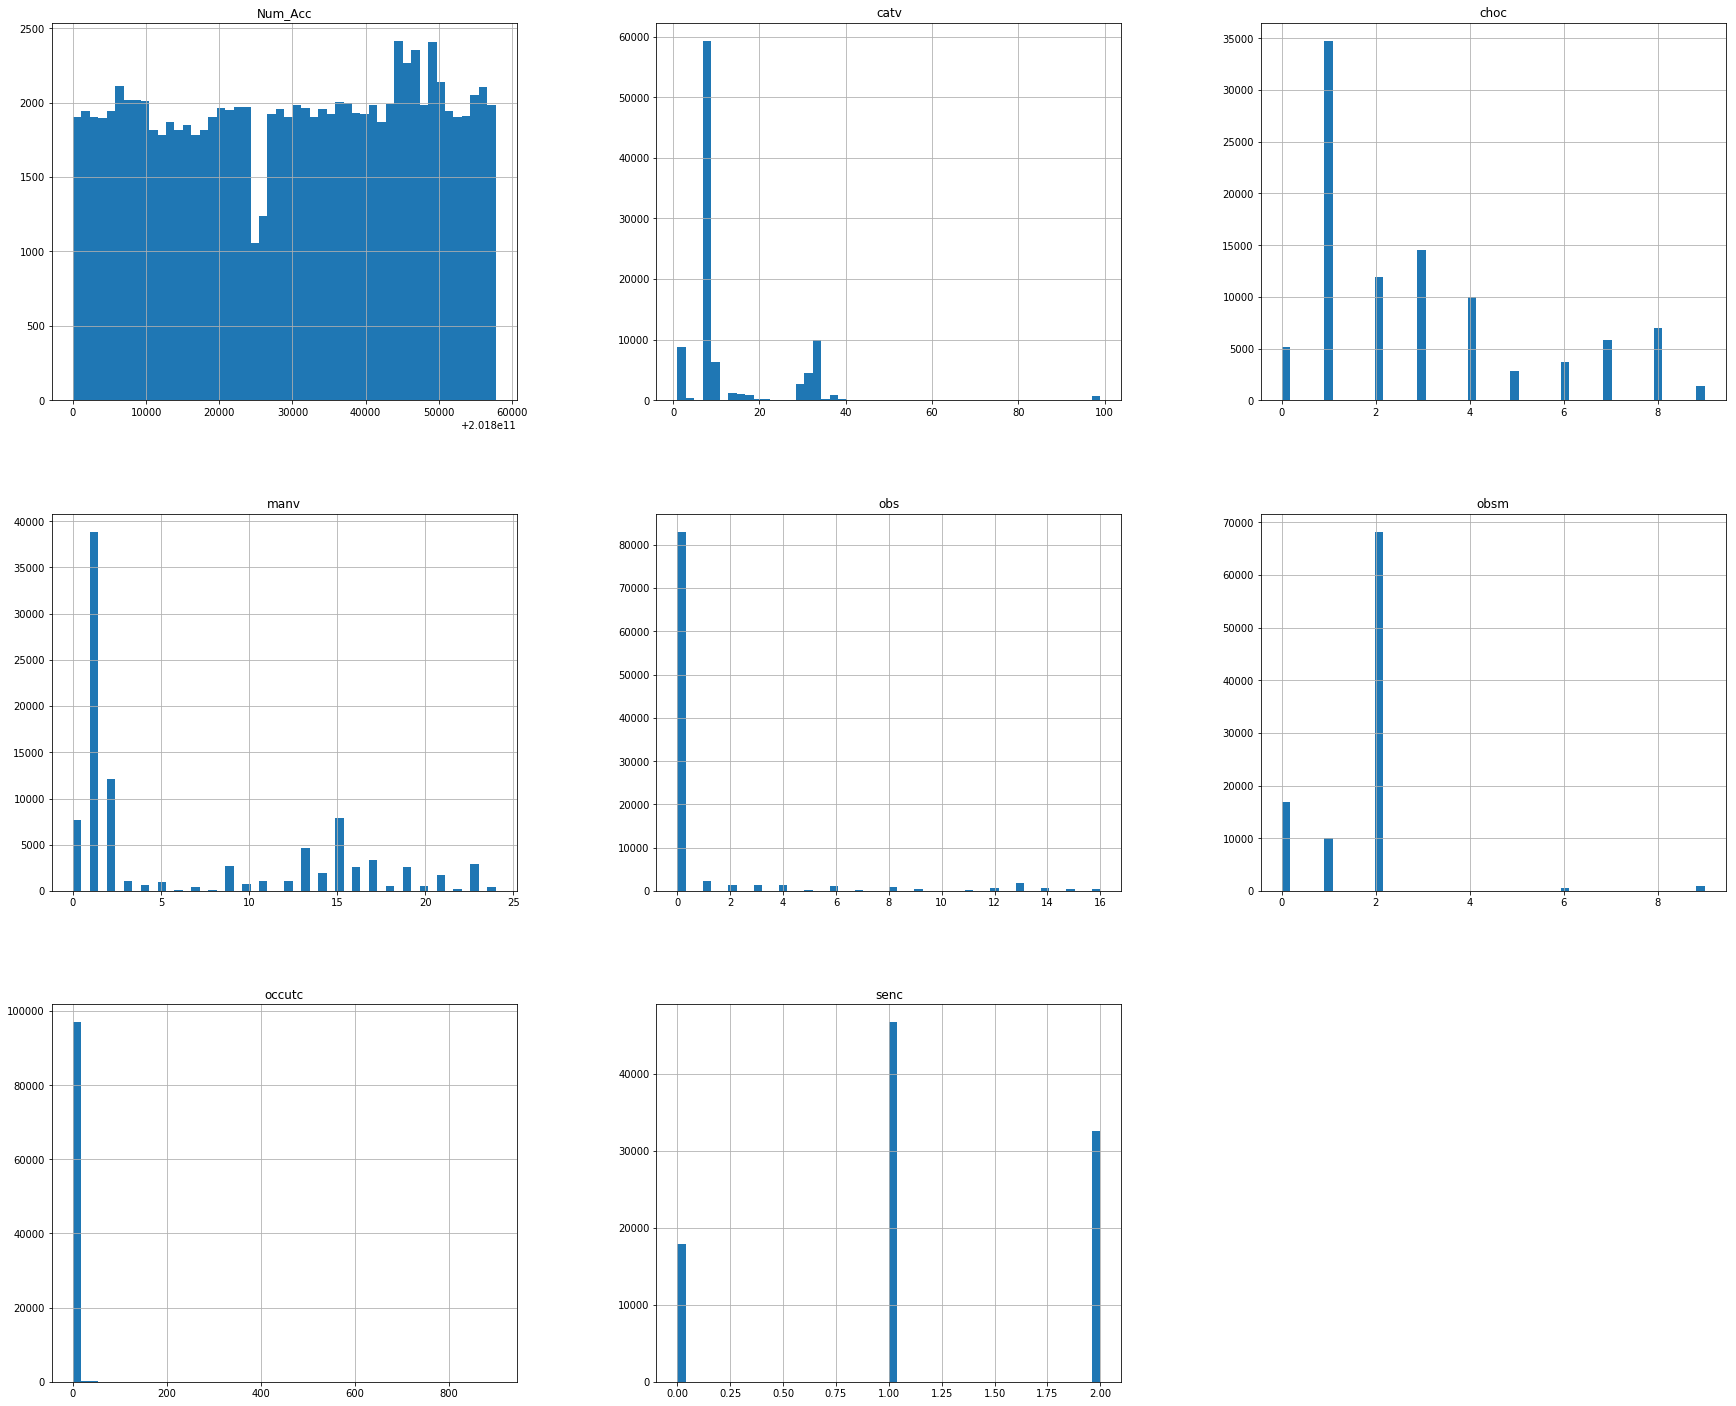

In [70]:
plt.figure()
d_veh.hist(bins=50,figsize=(30,25))
plt.show()

## Sous base vehicule

<Figure size 432x288 with 0 Axes>

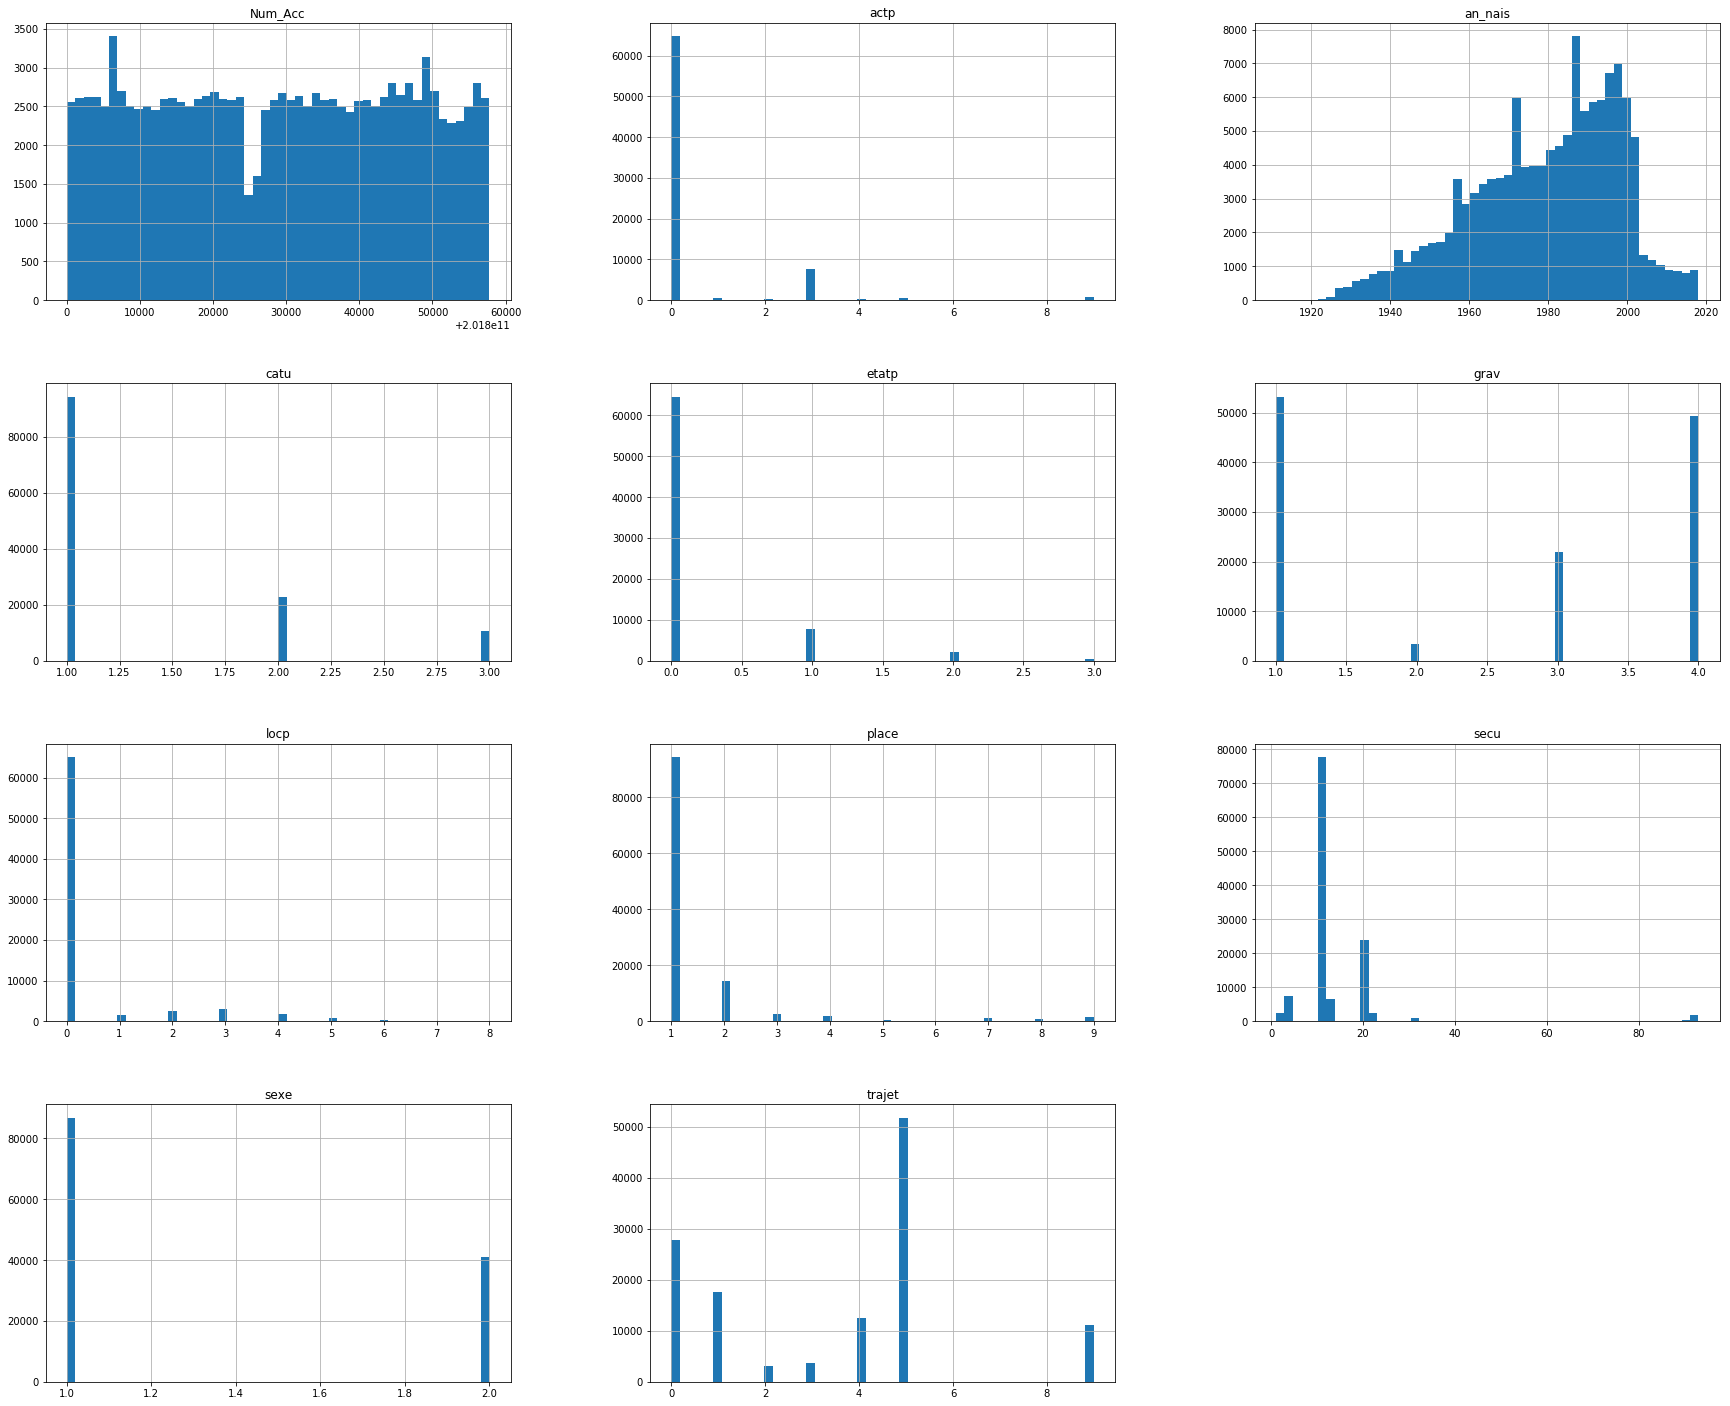

In [72]:
plt.figure()
d_vict.hist(bins=50,figsize=(30,25))
plt.show()

On realise aussi par cette sous base que la majorité de nos accidents sont des conducteurs, de plus de sexe masculin et sur des trajets de promenade, loisir, travail et domicile. 

# REUNION DES SOUS BASES
Par suite on essaye de concatener nos quatres sous bases pour voir de façon clair et façiliter le reste de l'etude en tenant compte qu'ils ont une variable en commun.

In [94]:
pd.set_option('display.max_column',51)
df_0=pd.merge(d_carac,d_lieux)
df_1=pd.merge(d_veh,d_vict)
df=pd.merge(df_0,df_1)
df.head()


,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,catr,voie,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,senc,catv,occutc,obs,obsm,choc,manv,num_veh,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
0,201800000001,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,3,41,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,7,0,0.0,2.0,3.0,1.0,B01,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0
1,201800000001,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,3,41,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,7,0,0.0,2.0,2.0,15.0,A01,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0
2,201800000002,2,12,1015,1,2,7,7.0,7.0,11,Place du gйnйral de Gaul,M,5052936.0,293151.0,590,4,41,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,7,0,0.0,1.0,0.0,1.0,A01,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0
3,201800000002,2,12,1015,1,2,7,7.0,7.0,11,Place du gйnйral de Gaul,M,5052936.0,293151.0,590,4,41,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,7,0,0.0,1.0,0.0,1.0,A01,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0
4,201800000003,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590,3,39,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,33,0,1.0,2.0,1.0,1.0,A01,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0


In [95]:
print(df.shape)
df.dtypes.value_counts()

(127951, 48)


float64    29
int64      15
object      4
dtype: int64

On a en tout 127951 lignes et 48 variables, dont parmi les variables 21 sont qualitaives et 30 quantitatives.

ANALYSE DES VALEURS MANQUANTES DE LA REUNION DE NOS QUATRES SOUS BASES

In [28]:

df.shape

(127951, 49)

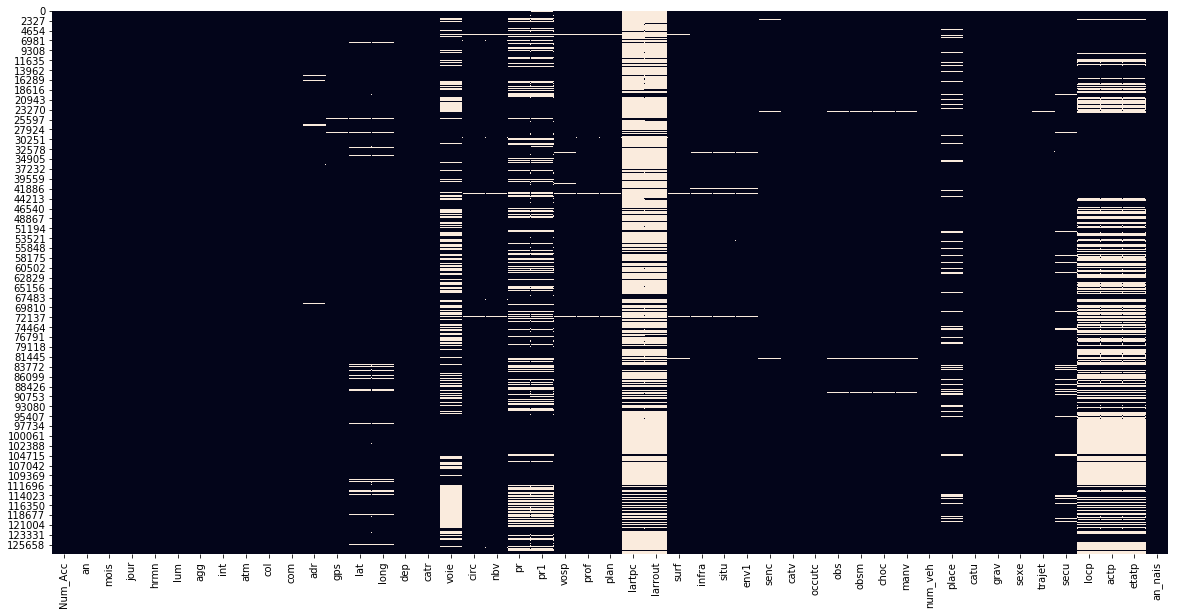

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [39]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Num_Acc    0.000000
catr       0.000000
dep        0.000000
num_veh    0.000000
catu       0.000000
grav       0.000000
sexe       0.000000
com        0.000000
occutc     0.000000
catv       0.000000
int        0.000000
agg        0.000000
lum        0.000000
hrmn       0.000000
jour       0.000000
mois       0.000000
an         0.000000
col        0.000063
atm        0.000070
an_nais    0.000234
gps        0.000805
trajet     0.000891
obsm       0.001110
choc       0.001172
manv       0.001243
senc       0.001336
obs        0.001704
circ       0.007222
plan       0.007589
prof       0.007855
surf       0.008003
env1       0.008277
infra      0.008402
situ       0.008863
nbv        0.009089
vosp       0.009449
adr        0.009941
secu       0.031684
lat        0.032098
long       0.032098
place      0.083829
pr         0.257122
pr1        0.261882
voie       0.351799
etatp      0.414635
actp       0.414643
locp       0.414659
larrout    0.771428
lartpc     0.778868
dtype: float64

les variables: locp,actp et etatp sont tous à 41% de valeurs manquantes,
voie, pr et pr1 sont respectivement a 35%,25% et 26% de valeurs manquantes 

## RECHERCHE DE CORRELATIONS

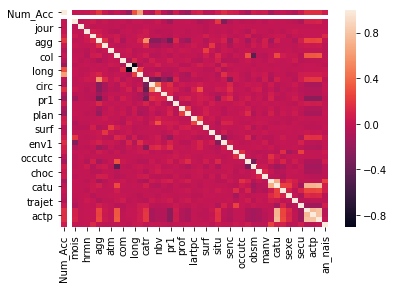

In [42]:
corr_matrix=df.corr()
plt.figure()
sns.heatmap(corr_matrix)

Certaines variablees sont très corrélées:+ 0.7(a surveillés plus tard). On essaye de voir plus claire avec nos quatres sous bases

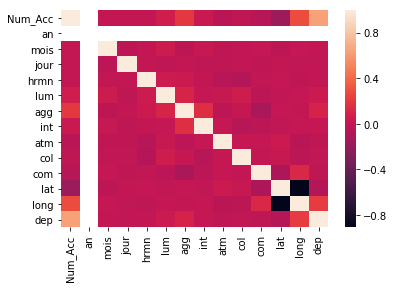

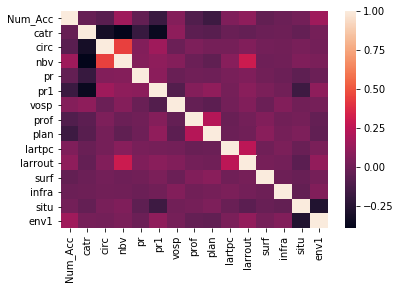

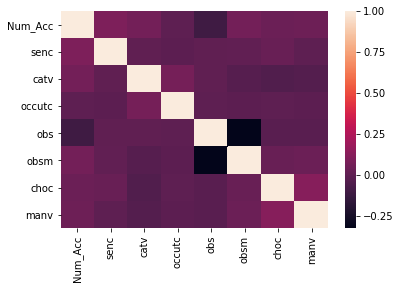

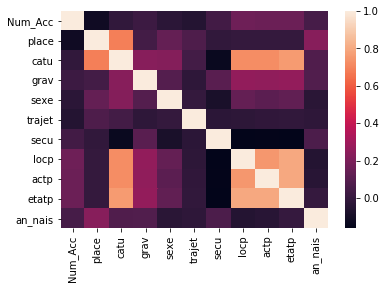

In [43]:
L=[d_carac,d_lieux,d_veh,d_vict]
for i in L:
    plt.figure()
    sns.heatmap(i.corr())

Les variables locp,actp, et etatp sont très corrélées, de plus place et catu les sont aussi dans la sous base victime.


En regardant la corrélation entre notre variable a predire et 

In [44]:

print(corr_matrix['grav'].sort_values(ascending=True))
print('________________')
#for i in df.columns:
   # if df['grav'].corr(df[i])<0.005 and df['grav'].corr(df[i])>-0.005:
        #print(df['grav'].corr(df[i]))
        #print(i)

obsm      -0.115163
manv      -0.076714
choc      -0.036777
occutc    -0.021935
pr1       -0.021168
hrmn      -0.020045
trajet    -0.017088
pr        -0.016571
circ      -0.013022
lartpc    -0.011789
nbv       -0.006542
int       -0.006295
com       -0.005074
agg       -0.004587
atm       -0.004481
jour      -0.004354
infra     -0.003606
long      -0.000259
lat       -0.000239
larrout    0.000127
dep        0.001801
vosp       0.002829
mois       0.003021
senc       0.005149
catr       0.006518
env1       0.008745
prof       0.008930
Num_Acc    0.022672
surf       0.023249
lum        0.031637
plan       0.036671
place      0.043819
situ       0.052327
col        0.061675
an_nais    0.086081
sexe       0.095533
secu       0.106894
obs        0.110041
catv       0.152668
catu       0.237417
actp       0.258169
locp       0.264571
etatp      0.269241
grav       1.000000
an              NaN
Name: grav, dtype: float64
________________


 Dans l'ensemble notre variable cible n'a pas une forte corrélation positive, et meme négative avec les autres varoiables. 
 Elle a beaucoup plus de corrélation avec la variable categorie d'usagé que les autres donc cela fait savoir qu'evidement 
 le fait d'etre piéton, passager, conducteur ou meme piéton en roller ou en trotinette a peut etre un impact sur notre sur la    gravité de la blessure. De plus les variables etatp,locp,actp, catv ont aussi une faible corrélation positive avec la gravité.
 On remarque une faible corrélation negative entre la gravité et la variable obsm (obstacle mobile heurté).

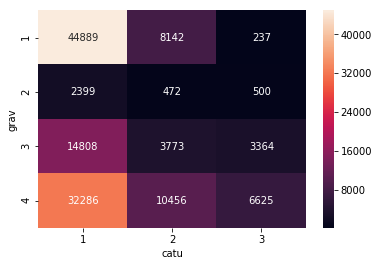

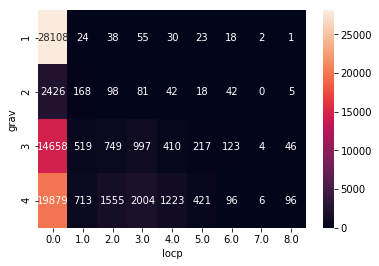

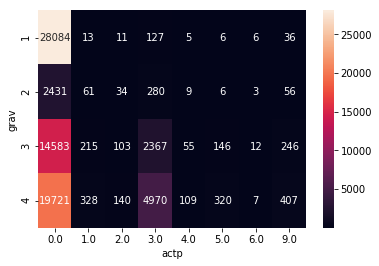

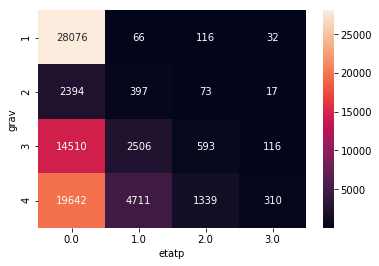

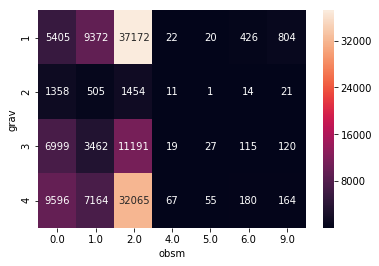

In [45]:
liste=['catu','locp','actp','etatp','obsm']
L=[]
for i in liste:
    L.append(df[i])
L=pd.DataFrame(L).transpose()
for col in L:
    plt.figure()
    sns.heatmap(pd.crosstab(df['grav'],df[col]),annot=True,fmt='d')   

 On peut voir ici que parfaitement 73% d'usager sont conducteurs, 17% Passagers et 8% pietons.
 On Constate que 44889, 2399, 14808, 32286 conducteurs, 8142, 472,3773 et 10456 pasagers et 237,500, 3364 et 6625
 piétons victimes sont respectivements indemnes, Tués, blessés hospitalisé et blessés legers. les conducteurs victimes indemenes
 sont les plus dominants.   
 De meme on peut voir la repatition avec de la gravité avec les autres variables dont leurs corrélations sont superieures ou égale
 a 0.18 et l'unique variable ou on constate une faible correlation qui est obsm.

# GESTION DES VALEURS MANQUANTES
    

In [46]:
! pip install datacleaner

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
from datacleaner import autoclean


In [97]:
df_f=autoclean(df,drop_nans=False,copy=True, ignore_update_check=False)


In [96]:
df_f.head()
df_f.shape

(127951, 48)

In [50]:
df_f.isnull().sum().any()

False

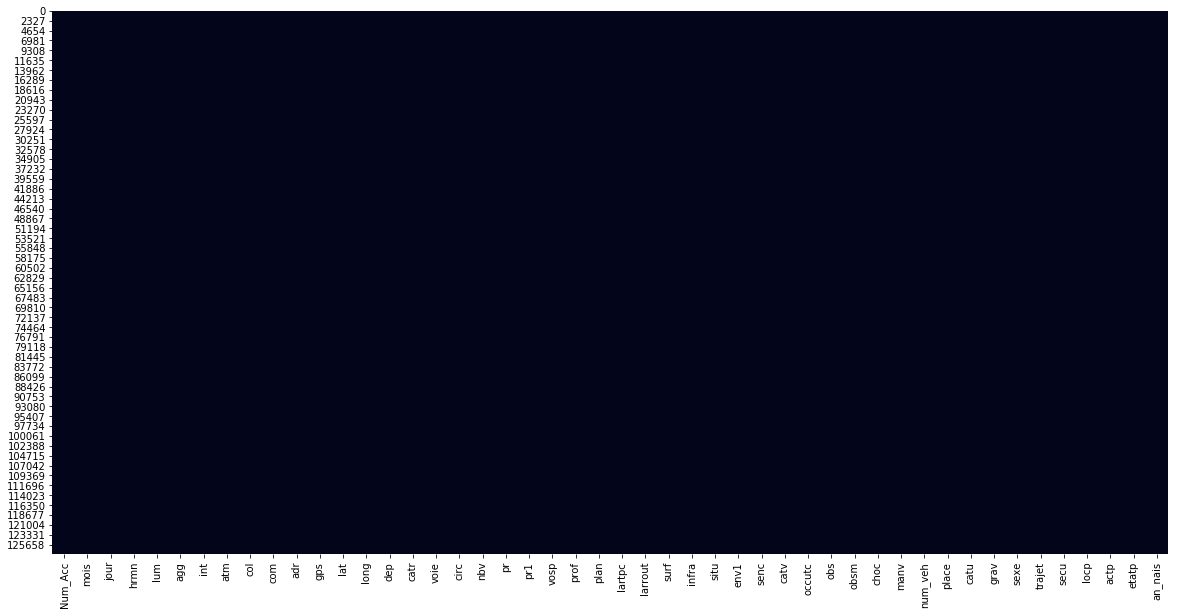

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df_f.isna(),cbar=False)

Notre base de donnée est bien netoyé et ne contient plus de valeurs manquantes.
On va enlever la variable Numero Accident qui n'intervient pas dans la prediction de la gravité de des accidents.

In [99]:
df_f=df_f.drop('Num_Acc',axis=1)


In [53]:
df_f.dtypes.value_counts()

float64    29
int64      19
dtype: int64

In [54]:
df_f.head()
df_f.shape

(127951, 48)

In [55]:
df_f['grav'].value_counts(normalize=True)

1    0.416316
4    0.385827
3    0.171511
2    0.026346
Name: grav, dtype: float64

On constate les memes proportions avant et apès traitement des valeurs manquantes.

## APPLICATION DE L'ACP
ANALYSE EN COMPOSANTE PRINCIPALE


In [56]:
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition # PCA et NMF

 On va centré et reduit nos données:

In [57]:
sc=StandardScaler()
x=sc.fit_transform(df_f)
acp = decomposition.PCA(svd_solver='full')
coord = acp.fit_transform(x)

Nombre de composants a calculés

In [58]:

print(acp.n_components_) 

48


Variance Expliquée

In [59]:
print(acp.explained_variance_)

[3.89778566e+00 2.86461080e+00 2.31442146e+00 1.98957124e+00
 1.78999668e+00 1.54179437e+00 1.46891089e+00 1.31785269e+00
 1.24646830e+00 1.21428093e+00 1.15167882e+00 1.11753069e+00
 1.07572834e+00 1.06597482e+00 1.06506211e+00 1.01996507e+00
 1.00378555e+00 9.94104036e-01 9.72343609e-01 9.62896736e-01
 9.31586612e-01 9.22311442e-01 9.13425794e-01 8.70585902e-01
 8.52171978e-01 8.36812424e-01 8.13171190e-01 7.91133006e-01
 7.65049573e-01 7.57782584e-01 7.39631420e-01 7.25905049e-01
 7.02408768e-01 6.78695848e-01 6.57772898e-01 6.35769318e-01
 6.32174983e-01 6.08601284e-01 5.86455086e-01 5.54921006e-01
 4.83908712e-01 4.45702911e-01 3.50018698e-01 2.35019142e-01
 1.92734304e-01 1.67400437e-01 7.44541499e-02 2.56115302e-32]


Proportion des variances expliquées


In [60]:
Ratio=acp.explained_variance_ratio_
Ratio

array([8.29309616e-02, 6.09486897e-02, 4.92426249e-02, 4.23309721e-02,
       3.80847382e-02, 3.28038792e-02, 3.12531789e-02, 2.80391997e-02,
       2.65203949e-02, 2.58355626e-02, 2.45036132e-02, 2.37770629e-02,
       2.28876581e-02, 2.26801380e-02, 2.26607188e-02, 2.17012150e-02,
       2.13569725e-02, 2.11509844e-02, 2.06880002e-02, 2.04870045e-02,
       1.98208368e-02, 1.96234943e-02, 1.94344395e-02, 1.85229595e-02,
       1.81311770e-02, 1.78043805e-02, 1.73013795e-02, 1.68324856e-02,
       1.62775233e-02, 1.61229077e-02, 1.57367157e-02, 1.54446676e-02,
       1.49447506e-02, 1.44402243e-02, 1.39950587e-02, 1.35269011e-02,
       1.34504264e-02, 1.29488623e-02, 1.24776703e-02, 1.18067376e-02,
       1.02958496e-02, 9.48296654e-03, 7.44714814e-03, 5.00036820e-03,
       4.10069782e-03, 3.56168360e-03, 1.58411847e-03, 5.44921916e-34])

In [61]:
def somme_Ratio(L):
    s=0
    for i in range(len(L)-9):
        s=s+L[i]
    return s

In [62]:
somme_Ratio(Ratio)

0.9467204300372408

Nous disposons de 93% avec les 38 premiers facteurs.

In [64]:
p=x.shape[1]
n=x.shape[0]
eigval = (n-1)/n*acp.explained_variance_
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
# test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   3.897755e+00  4.458797
1   2.864588e+00  3.458797
2   2.314403e+00  2.958797
3   1.989556e+00  2.625464
4   1.789983e+00  2.375464
5   1.541782e+00  2.175464
6   1.468899e+00  2.008797
7   1.317842e+00  1.865940
8   1.246459e+00  1.740940
9   1.214271e+00  1.629829
10  1.151670e+00  1.529829
11  1.117522e+00  1.438920
12  1.075720e+00  1.355586
13  1.065966e+00  1.278663
14  1.065054e+00  1.207235
15  1.019957e+00  1.140568
16  1.003778e+00  1.078068
17  9.940963e-01  1.019245
18  9.723360e-01  0.963689
19  9.628892e-01  0.911058
20  9.315793e-01  0.861058
21  9.223042e-01  0.813438
22  9.134187e-01  0.767984
23  8.705791e-01  0.724506
24  8.521653e-01  0.682839
25  8.368059e-01  0.642839
26  8.131648e-01  0.604377
27  7.911268e-01  0.567340
28  7.650436e-01  0.531626
29  7.577767e-01  0.497143
30  7.396256e-01  0.463810
31  7.258994e-01  0.431552
32  7.024033e-01  0.400302
33  6.786905e-01  0.369999
34  6.577678e-01  0.340587
35  6.357643e-01  0.312016
3

Ici aucun des facteurs n'est valide.

Text(0.5,1,'Variance expliquée')

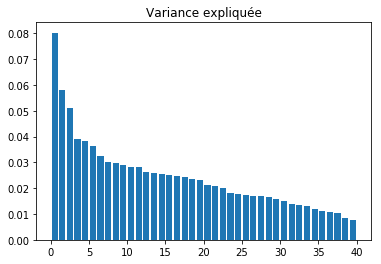

In [66]:
from sklearn.preprocessing import normalize
xnorm = normalize(x)
pca = decomposition.PCA(n_components=40)
pca.fit(xnorm)
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

La reduction de la dimension n'est pas trop interessante ici, les differentes composantes ont tous vraiment des pourcentage très petite,donc pas assez d'information pour etre significative.

## Decoupage de notre jeu de données:
Nous devons maintenant séparer les données en fonction des caractéristiques et des cibles. La cible, également appelée étiquette, est la valeur que nous voulons prédire (y).

In [122]:
X=df_f.drop('grav',axis=1)
y=df_f['grav']
#print(y.head())
#print(X.head())
print(df_f.shape)

(127951, 47)


# Division de la base donnees en base de données test et d'entrainement
Il y a une dernière étape de préparation des données, la division des données en ensembles de formation et de test. Pendant la formation, nous laissons le modèle "voir" les réponses, dans ce cas la gravité, afin qu'il puisse apprendre à prédire la gravité à partir des caractéristiques. Nous nous attendons à ce qu'il y ait une certaine relation entre toutes les caractéristiques et la valeur cible, et le travail du modèle consiste à apprendre cette relation pendant la formation. Ensuite, lorsque vient le moment d'évaluer le modèle, nous lui demandons de faire des prédictions sur un banc d'essai où il n'a accès qu'aux caractéristiques (pas aux réponses) ! Comme nous disposons des réponses réelles pour l'ensemble de tests, nous pouvons comparer ces prédictions à la valeur réelle pour juger de la précision du modèle


In [131]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train, test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
print(' X_train taille',X_train.shape)  
print(' X_test taille',X_test.shape) 
print(' y_train taille',y_train.shape) 
print(' y_test taille',y_test.shape) 

 X_train taille (102360, 46)
 X_test taille (25591, 46)
 y_train taille (102360,)
 y_test taille (25591,)


## APPLICATIONS DES ALGORITHMES:


In [132]:
models={
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
    'RandomForestClassifier':RandomForestClassifier(n_estimators = 100, random_state = 42) 
}
#model1=DecisionTreeClassifier(max_depth=1,random_state=42)
#model2=RandomForestClassifier(n_estimators = 100, random_state = 42)

## FONCTION DE PRECISION:

In [133]:
def accu(y_true,y_pred,retu=False):
    accu=accuracy_score(y_true,y_pred)
    if retu:
        return accu
    else:
        print (f'La precision du modèle est: {accu}')

## FONCTION D'APLLICATION DES MODELES

In [134]:
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name, models in models.items():
        print(name,':')
        models.fit(X_train,y_train)
        y_pred=models.predict(X_test)
        accu(y_test,y_pred)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        print ('_'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)
#train_test_eval(model2,X_train,y_train,X_test,y_test)

DecisionTreeClassifier :
La precision du modèle est: 0.5180336837169317
[[9950    0    0  704]
 [ 471    0    0  203]
 [2586    0    0 1803]
 [6567    0    0 3307]]
             precision    recall  f1-score   support

          1       0.51      0.93      0.66     10654
          2       0.00      0.00      0.00       674
          3       0.00      0.00      0.00      4389
          4       0.55      0.33      0.42      9874

avg / total       0.42      0.52      0.43     25591

______________________________
RandomForestClassifier :


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


La precision du modèle est: 0.6715642217967254
[[9047    8  283 1316]
 [ 121   20  365  168]
 [ 745   29 1804 1811]
 [2592   10  957 6315]]
             precision    recall  f1-score   support

          1       0.72      0.85      0.78     10654
          2       0.30      0.03      0.05       674
          3       0.53      0.41      0.46      4389
          4       0.66      0.64      0.65      9874

avg / total       0.65      0.67      0.66     25591

______________________________


Pour DecisionTreeClassifier sur 10654 de victime indemnes dans notre test_set on a pu identifier que 9950 sont indimnes avec une precision de 51% et un recall de 85%. Un model qui nous satisfait pas du tout avec ses score.
Parcontre après l'application de RandomForestClassifier sur 10654 de victime indemnes dans notre test_set on a pu identifier que 9047 sont indimnes avec une precision de 72% et un recall de 85%, sur 674 victimes tués dans notre test_set on identifie 20 victimes classés tués avec une précision de 30%, sur 4389 victimes blessés hospitalisés on apperçoit que reelement avec notre model 1804 sont blessés hospitalisés avec une précision de 53% et pour finir sur 9874 victimes blessés legers on apperçoit que reelement avec notre model 3307 sont hospitalisés avec une précision de 66%. Donc ce model est beaucoup plus satisfaisant que le premier dans notre situation.
On decide donc de faire notre prediction avec le model construit par le random forets sur notre base de test.

## Apllication sur notre base de test

In [135]:
D_carac=pd.read_csv('carac-test.csv',sep=';',low_memory=False)
D_lieux=pd.read_csv('lieux-test.csv',sep=';',low_memory=False)
D_veh=pd.read_csv('veh-test.csv',sep=';',low_memory=False)
D_vict=pd.read_csv('vict-test.csv',sep=';',low_memory=False)

In [136]:
pd.set_option('display.max_column',51)
df_2=pd.merge(D_carac,D_lieux)
df_3=pd.merge(D_veh,D_vict)
DF=pd.merge(df_2,df_3)
DF.shape

(2218, 50)

In [137]:
DF=DF[DF.columns[DF.isna().sum()/DF.shape[0]<0.9]]

In [138]:
DF_F=autoclean(DF,drop_nans=False,copy=True, ignore_update_check=False)

In [139]:
DF_F=DF_F.drop('Num_Acc',axis=1)

In [140]:
DF_F=DF_F.drop('an',axis=1)
X.shape

(127951, 46)

In [107]:
DF_F.shape

(2218, 46)

In [141]:
clf=RandomForestClassifier(n_estimators = 100, random_state = 42) 

In [142]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accu(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

La precision du modèle est: 0.6715642217967254
[[9047    8  283 1316]
 [ 121   20  365  168]
 [ 745   29 1804 1811]
 [2592   10  957 6315]]
             precision    recall  f1-score   support

          1       0.72      0.85      0.78     10654
          2       0.30      0.03      0.05       674
          3       0.53      0.41      0.46      4389
          4       0.66      0.64      0.65      9874

avg / total       0.65      0.67      0.66     25591



In [143]:
grav=clf.predict(DF_F)
grav



array([3, 4, 1, ..., 4, 1, 4], dtype=int64)

In [144]:
gravite=pd.DataFrame(dict(label=grav))
gravite.to_csv('Prediction.csv',index=False)

In [2]:
ipython nbconvert notebook.ipynb --to latex --post pdf


SyntaxError: invalid syntax (<ipython-input-2-5fc72b8223d2>, line 1)